# Importing Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore") 
from datetime import datetime
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor

# Importing Confirmed cases of COVID-19 directly from githubusercontent as updated dataset

In [2]:
data_confirmed_cases= pd.read_csv('https://github.com/meaadalrehaili/Tuwaiq_Data_Science_Bootcamp/blob/main/Dataset/time_series_Confirmed.csv')

### Selecting the Specific dates 

In [3]:
data_confirmed_cases=data_confirmed_cases.iloc[:,0:80] #select dates for one month

# Exploratory data analysis

### Five top records of data

In [4]:
data_confirmed_cases.head() #shows the head

,Province/State,Country/Region,Lat,Long,1/21/20 22:00,1/22/20 12:00,1/23/20 12:00,1/24/20 0:00,1/24/20 12:00,1/25/20 0:00,...,02/09/2020 23:20,02/10/2020 10:30,02/10/2020 19:30,02/11/2020 10:50,02/11/2020 20:44,02/12/2020 10:20,02/12/2020 22:00,2/13/20 10:00,2/13/20 21:15,2/14/20 11:23
0,Anhui,Mainland China,31.82571,117.2264,NaN,1.0,9.0,15.0,15.0,39.0,...,830.0,830.0,830.0,860.0,889.0,889.0,910.0,910.0,934,934
1,Beijing,Mainland China,40.18238,116.4142,10.0,14.0,22.0,26.0,36.0,36.0,...,337.0,337.0,337.0,342.0,342.0,352.0,366.0,366.0,366,372
2,Chongqing,Mainland China,30.05718,107.8740,5.0,6.0,9.0,27.0,27.0,57.0,...,468.0,473.0,486.0,489.0,505.0,509.0,518.0,525.0,529,532
3,Fujian,Mainland China,26.07783,117.9895,NaN,1.0,5.0,5.0,10.0,10.0,...,261.0,261.0,261.0,267.0,272.0,272.0,279.0,279.0,281,281
4,Gansu,Mainland China,36.06110,103.8343,NaN,NaN,2.0,2.0,2.0,4.0,...,83.0,83.0,86.0,86.0,86.0,86.0,87.0,87.0,90,90


### Five last records of data

In [5]:
data_confirmed_cases.tail() #show the tail

,Province/State,Country/Region,Lat,Long,1/21/20 22:00,1/22/20 12:00,1/23/20 12:00,1/24/20 0:00,1/24/20 12:00,1/25/20 0:00,...,02/09/2020 23:20,02/10/2020 10:30,02/10/2020 19:30,02/11/2020 10:50,02/11/2020 20:44,02/12/2020 10:20,02/12/2020 22:00,2/13/20 10:00,2/13/20 21:15,2/14/20 11:23
7032,Wyoming,US,43.935225,-110.589080,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
7033,Wyoming,US,41.287818,-110.547578,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
7034,Wyoming,US,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
7035,Wyoming,US,43.904516,-107.680187,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
7036,Wyoming,US,43.839612,-104.567488,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


### Coloumns/features in data

In [6]:
data_confirmed_cases.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/21/20 22:00',
       '1/22/20 12:00', '1/23/20 12:00', '1/24/20 0:00', '1/24/20 12:00',
       '1/25/20 0:00', '1/25/20 12:00', '1/25/20 22:00', '1/26/20 11:00',
       '1/26/20 23:00', '1/27/20 9:00', '1/27/20 19:00', '1/27/20 20:30',
       '1/28/20 13:00', '1/28/20 18:00', '1/28/20 23:00', '1/29/20 13:30',
       '1/29/20 14:30', '1/29/20 21:00', '1/30/20 11:00', '1/31/20 14:00',
       '02/01/2020 10:00', '02/02/2020 21:00', '02/03/2020 21:00',
       '02/04/2020 9:40', '02/04/2020 22:00', '02/05/2020 9:00',
       '02/05/2020 23:00', '02/06/2020 9:00', '02/06/2020 14:20',
       '02/07/2020 20:13', '02/07/2020 22:50', '02/08/2020 10:24',
       '02/08/2020 23:04', '02/09/2020 10:30', '02/09/2020 23:20',
       '02/10/2020 10:30', '02/10/2020 19:30', '02/11/2020 10:50',
       '02/11/2020 20:44', '02/12/2020 10:20', '02/12/2020 22:00',
       '2/13/20 10:00', '2/13/20 21:15', '2/14/20 11:23'],
      dtype='object')

### Data information

In [7]:
data_confirmed_cases.info() #get the info of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7037 entries, 0 to 7036
Data columns (total 49 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Province/State    6824 non-null   object 
 1   Country/Region    7037 non-null   object 
 2   Lat               7035 non-null   float64
 3   Long              7035 non-null   float64
 4   1/21/20 22:00     6979 non-null   float64
 5   1/22/20 12:00     6992 non-null   float64
 6   1/23/20 12:00     7000 non-null   float64
 7   1/24/20 0:00      7001 non-null   float64
 8   1/24/20 12:00     7003 non-null   float64
 9   1/25/20 0:00      7005 non-null   float64
 10  1/25/20 12:00     7006 non-null   float64
 11  1/25/20 22:00     7006 non-null   float64
 12  1/26/20 11:00     7012 non-null   float64
 13  1/26/20 23:00     7012 non-null   float64
 14  1/27/20 9:00      7013 non-null   float64
 15  1/27/20 19:00     7014 non-null   float64
 16  1/27/20 20:30     7015 non-null   float64


### Data types of all coloumns

In [8]:
data_confirmed_cases.dtypes

Province/State       object
Country/Region       object
Lat                 float64
Long                float64
1/21/20 22:00       float64
1/22/20 12:00       float64
1/23/20 12:00       float64
1/24/20 0:00        float64
1/24/20 12:00       float64
1/25/20 0:00        float64
1/25/20 12:00       float64
1/25/20 22:00       float64
1/26/20 11:00       float64
1/26/20 23:00       float64
1/27/20 9:00        float64
1/27/20 19:00       float64
1/27/20 20:30       float64
1/28/20 13:00       float64
1/28/20 18:00       float64
1/28/20 23:00       float64
1/29/20 13:30       float64
1/29/20 14:30       float64
1/29/20 21:00       float64
1/30/20 11:00       float64
1/31/20 14:00       float64
02/01/2020 10:00    float64
02/02/2020 21:00    float64
02/03/2020 21:00    float64
02/04/2020 9:40     float64
02/04/2020 22:00    float64
02/05/2020 9:00     float64
02/05/2020 23:00    float64
02/06/2020 9:00     float64
02/06/2020 14:20    float64
02/07/2020 20:13    float64
02/07/2020 22:50    

### Checking Null Values and Province/State has Nan values, we will fix next

In [9]:
data_confirmed_cases[data_confirmed_cases.isnull().any(axis=1)].head()

,Province/State,Country/Region,Lat,Long,1/21/20 22:00,1/22/20 12:00,1/23/20 12:00,1/24/20 0:00,1/24/20 12:00,1/25/20 0:00,...,02/09/2020 23:20,02/10/2020 10:30,02/10/2020 19:30,02/11/2020 10:50,02/11/2020 20:44,02/12/2020 10:20,02/12/2020 22:00,2/13/20 10:00,2/13/20 21:15,2/14/20 11:23
0,Anhui,Mainland China,31.82571,117.2264,NaN,1.0,9.0,15.0,15.0,39.0,...,830.0,830.0,830.0,860.0,889.0,889.0,910.0,910.0,934,934
3,Fujian,Mainland China,26.07783,117.9895,NaN,1.0,5.0,5.0,10.0,10.0,...,261.0,261.0,261.0,267.0,272.0,272.0,279.0,279.0,281,281
4,Gansu,Mainland China,36.06110,103.8343,NaN,NaN,2.0,2.0,2.0,4.0,...,83.0,83.0,86.0,86.0,86.0,86.0,87.0,87.0,90,90
6,Guangxi,Mainland China,23.82908,108.7881,NaN,2.0,5.0,13.0,23.0,23.0,...,210.0,210.0,210.0,215.0,222.0,222.0,222.0,222.0,226,226
7,Guizhou,Mainland China,26.81536,106.8748,NaN,1.0,3.0,3.0,3.0,4.0,...,109.0,109.0,109.0,127.0,131.0,133.0,135.0,135.0,140,140


### Count of Null values,  this count is 254 and all is from Province/State

In [10]:
np.sum(data_confirmed_cases.isnull().any(axis=1))

254

### Data Description, here we can see the values of columns as minimum value, maximum value, counts etc

In [11]:
data_confirmed_cases.describe()

,Lat,Long,1/21/20 22:00,1/22/20 12:00,1/23/20 12:00,1/24/20 0:00,1/24/20 12:00,1/25/20 0:00,1/25/20 12:00,1/25/20 22:00,...,02/09/2020 23:20,02/10/2020 10:30,02/10/2020 19:30,02/11/2020 10:50,02/11/2020 20:44,02/12/2020 10:20,02/12/2020 22:00,2/13/20 10:00,2/13/20 21:15,2/14/20 11:23
count,7035.000000,7035.000000,6979.000000,6992.000000,7000.000000,7001.000000,7003.000000,7005.000000,7006.000000,7006.000000,...,7035.000000,7035.000000,7035.000000,7036.000000,7036.000000,7036.000000,7036.000000,7036.000000,7037.000000,7037.000000
mean,36.007337,-82.702337,0.127382,0.173341,0.228429,0.331238,0.438241,0.612420,1.002284,1.169426,...,17.335466,17.534044,18.043070,18.364838,18.987351,19.286384,21.811541,22.152928,23.147648,23.727441
std,10.850737,37.909232,6.239945,7.548971,8.544980,11.419337,14.593277,19.628055,43.810972,44.995040,...,855.256677,859.841071,874.042947,878.965648,894.131411,896.805720,990.142680,992.050816,1021.056492,1023.890286
min,-51.796300,-178.116500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.542626,-97.595757,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.851064,-88.764439,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,41.568469,-81.180859,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,71.706900,178.065000,444.000000,444.000000,549.000000,761.000000,1058.000000,1423.000000,3554.000000,3554.000000,...,65187.000000,65596.000000,65914.000000,66337.000000,66907.000000,67103.000000,67217.000000,67332.000000,67466.000000,67592.000000


# Prepartion of data_confirmed_cases data

### Deleitng the Province/State	Country/Region	Lat	Long	 coloumns

In [12]:
data_confirmed_cases=data_confirmed_cases.drop(columns=['Province/State','Country/Region', 'Lat','Long'])

In [13]:
data_confirmed_cases.head()

,1/21/20 22:00,1/22/20 12:00,1/23/20 12:00,1/24/20 0:00,1/24/20 12:00,1/25/20 0:00,1/25/20 12:00,1/25/20 22:00,1/26/20 11:00,1/26/20 23:00,...,02/09/2020 23:20,02/10/2020 10:30,02/10/2020 19:30,02/11/2020 10:50,02/11/2020 20:44,02/12/2020 10:20,02/12/2020 22:00,2/13/20 10:00,2/13/20 21:15,2/14/20 11:23
0,NaN,1.0,9.0,15.0,15.0,39.0,39.0,60.0,60.0,70.0,...,830.0,830.0,830.0,860.0,889.0,889.0,910.0,910.0,934,934
1,10.0,14.0,22.0,26.0,36.0,36.0,41.0,51.0,68.0,68.0,...,337.0,337.0,337.0,342.0,342.0,352.0,366.0,366.0,366,372
2,5.0,6.0,9.0,27.0,27.0,57.0,57.0,75.0,75.0,110.0,...,468.0,473.0,486.0,489.0,505.0,509.0,518.0,525.0,529,532
3,NaN,1.0,5.0,5.0,10.0,10.0,18.0,18.0,35.0,35.0,...,261.0,261.0,261.0,267.0,272.0,272.0,279.0,279.0,281,281
4,NaN,NaN,2.0,2.0,2.0,4.0,4.0,7.0,7.0,14.0,...,83.0,83.0,86.0,86.0,86.0,86.0,87.0,87.0,90,90


### Getting sum of all dates

In [14]:
data_confirmed_cases=data_confirmed_cases.sum()
data_confirmed_cases.head()

1/21/20 22:00     889.0
1/22/20 12:00    1212.0
1/23/20 12:00    1599.0
1/24/20 0:00     2319.0
1/24/20 12:00    3069.0
dtype: float64

### Saving the sum of all dates in dataframe

In [15]:
data_confirmed_cases=pd.DataFrame(data_confirmed_cases)
data_confirmed_cases.head()

,0
1/21/20 22:00,889.0
1/22/20 12:00,1212.0
1/23/20 12:00,1599.0
1/24/20 0:00,2319.0
1/24/20 12:00,3069.0


### Creating new column of Dates

In [16]:
data_confirmed_cases['Dates']=data_confirmed_cases.index
data_confirmed_cases.head()

,0,Dates
1/21/20 22:00,889.0,1/21/20 22:00
1/22/20 12:00,1212.0,1/22/20 12:00
1/23/20 12:00,1599.0,1/23/20 12:00
1/24/20 0:00,2319.0,1/24/20 0:00
1/24/20 12:00,3069.0,1/24/20 12:00


### Reseting the index

In [17]:
data_confirmed_cases=data_confirmed_cases.reset_index(drop=True)
data_confirmed_cases.head()

,0,Dates
0,889.0,1/21/20 22:00
1,1212.0,1/22/20 12:00
2,1599.0,1/23/20 12:00
3,2319.0,1/24/20 0:00
4,3069.0,1/24/20 12:00


### Renaming the column

In [18]:
data_confirmed_cases=data_confirmed_cases.rename(columns={0:'data_confirmed_cases'})
data_confirmed_cases=data_confirmed_cases[['Dates','data_confirmed_cases']]
data_confirmed_cases.head()

,Dates,data_confirmed_cases
0,1/21/20 22:00,889.0
1,1/22/20 12:00,1212.0
2,1/23/20 12:00,1599.0
3,1/24/20 0:00,2319.0
4,1/24/20 12:00,3069.0


### Date settings and data preparation

In [19]:
data_confirmed_cases['times'] = pd.to_datetime(data_confirmed_cases['Dates'])  
data_confirmed_cases.set_index('times', inplace=True)                   
data_confirmed_cases.sort_index(ascending=True, inplace=True)
tar='Confirmed Cases Predictions'
data_confirmed_cases.rename(columns={'data_confirmed_cases':tar}, inplace=True)
data_confirmed_cases=data_confirmed_cases[[tar]]

### Spliting date into  month, year and Day of month

In [20]:
def create_features(data, label=None):
    data['date'] = data.index
    data['month'] = data['date'].dt.month
    data['year'] = data['date'].dt.year
    data['dayofmonth'] = data['date'].dt.day
    X = data[['month','year','dayofmonth']]
    if label:
        y = data[label]
        return X, y
    return X

### Data for training input and prediction output

In [21]:
X=data_confirmed_cases.copy()
X= create_features(X)
y=data_confirmed_cases
y=np.array(y)
y_t = y[:int(0.87*(len(y)))]

# Ensemble Technique to combine algorithms (GradientBoostingRegressor + random Forest Regressor) 

In [22]:
RF_model = RandomForestRegressor()
GB_model  = GradientBoostingRegressor()

In [23]:
Ens = VotingRegressor( estimators= [('model1',RF_model),('model2',GB_model)])
Ens= Ens.fit(X , y)
Ens

VotingRegressor(estimators=[('model1', RandomForestRegressor()),
                            ('model2', GradientBoostingRegressor())])

## Graph of the actual and predicted Confirmed cases with 10 days forecasting

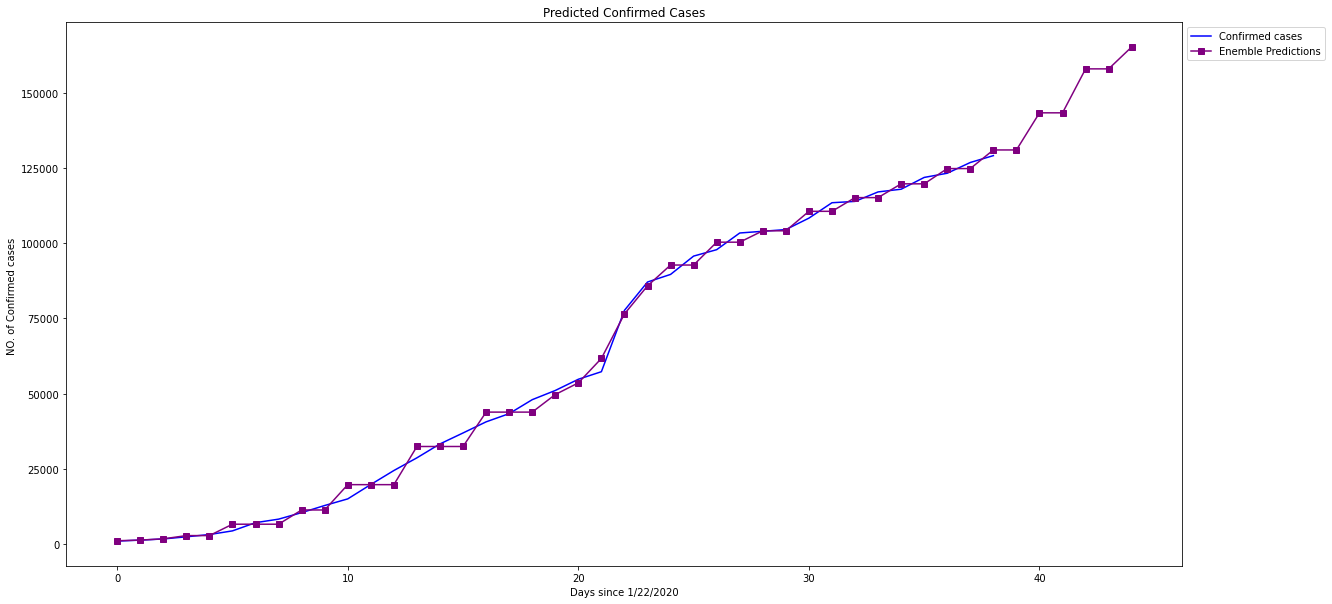

In [24]:
plt.figure(figsize=(20, 10))
plt.subplot(1,1,1)
pred=Ens.predict(X)
plt.plot(y_t,color='blue',label='Confirmed cases')
plt.plot(pred,color='purple',label='Enemble Predictions',marker= "s")
plt.title('Predicted Confirmed Cases')
plt.xlabel('Days since 1/22/2020')
plt.ylabel('NO. of Confirmed cases ')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

# Evaluation Measures

### R2

In [25]:
y_pred = Ens.predict(X)
R_square=r2_score(y,y_pred)
print('R2 : ', round(R_square,5))

R2 :  0.9967


### Adjusted R2

In [26]:
print('Adjusted R2 :', round(1-(1-R_square)*(len(X)-1)/(len(X)-2-1), 5))

Adjusted R2 : 0.99655


### MSE

In [27]:
mse=mean_squared_error(y,y_pred)
print('Mean Squared Error: ', round(mse,2))

Mean Squared Error:  9168257.21


### MAE

In [28]:
mae=mean_absolute_error(y,y_pred)
print('Mean Absolute Error: ', round(mae,2))

Mean Absolute Error:  2275.79


### RMSE

In [29]:
rmse = math.sqrt(mse)
print('RMSE: ', round(rmse,2))

RMSE:  3027.91


# Importing Recovred cases of COVID-19 directly from githubusercontent as updated dataset

In [70]:
data_recovered=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

### Selecting the Specific dates 

In [71]:
data_recovered=data_recovered.iloc[:,0:80]

# Exploratory data analysis

### Five top records of data

In [72]:
data_recovered.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,2,2,2,5,5,10,10,10,15,18
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,31,33,44,52,67,76,89,99,104,116
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,31,31,37,46,61,61,62,90,90,90
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,1,1,10,10,10,10,16,21,26,31
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,0,0,0,1,1,1,1,2,2,2


### Five last records of data

In [73]:
data_recovered.tail()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20
259,NaN,Vietnam,14.058324,108.277199,0,0,0,0,0,0,...,21,25,55,58,63,75,85,90,90,95
260,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,18,18,18,18,18,18,21,21,25,24
261,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
262,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,0,0,0,0,0,0,2,2,3,5
263,NaN,Zimbabwe,-19.015438,29.154857,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Coloumns/features in data

In [74]:
data_recovered.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20',
       '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20',
       '3/27/20', '3/28/20', '3/29/20', '3/30/20', '3/31/20', '4/1/20',
       '4/2/20', '4/3/20', '4/4/20', '4/5/20', '4/6/20'],
      dtype='object')

### Data information

In [75]:
data_recovered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 80 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  71 non-null     object 
 1   Country/Region  264 non-null    object 
 2   Lat             263 non-null    float64
 3   Long            263 non-null    float64
 4   1/22/20         264 non-null    int64  
 5   1/23/20         264 non-null    int64  
 6   1/24/20         264 non-null    int64  
 7   1/25/20         264 non-null    int64  
 8   1/26/20         264 non-null    int64  
 9   1/27/20         264 non-null    int64  
 10  1/28/20         264 non-null    int64  
 11  1/29/20         264 non-null    int64  
 12  1/30/20         264 non-null    int64  
 13  1/31/20         264 non-null    int64  
 14  2/1/20          264 non-null    int64  
 15  2/2/20          264 non-null    int64  
 16  2/3/20          264 non-null    int64  
 17  2/4/20          264 non-null    int

### Data types of all coloumns

In [76]:
data_recovered.dtypes

Province/State     object
Country/Region     object
Lat               float64
Long              float64
1/22/20             int64
                   ...   
4/2/20              int64
4/3/20              int64
4/4/20              int64
4/5/20              int64
4/6/20              int64
Length: 80, dtype: object

### Checking Null Values and Province/State has Nan values, we will fix next

In [77]:
data_recovered[data_recovered.isnull().any(axis=1)].head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,2,2,2,5,5,10,10,10,15,18
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,31,33,44,52,67,76,89,99,104,116
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,31,31,37,46,61,61,62,90,90,90
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,1,1,10,10,10,10,16,21,26,31
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,0,0,0,1,1,1,1,2,2,2


### Count of Null values,  this count is 185 and all is from Province/State

In [78]:
np.sum(data_recovered.isnull().any(axis=1))

194

### Data Description, here we can see the values of columns as minimum value, maximum value, counts etc

In [79]:
data_recovered.describe()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20
count,263.000000,263.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,...,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000
mean,18.882762,27.856510,0.113636,0.121212,0.147727,0.159091,0.212121,0.246212,0.409091,0.481061,...,528.109848,563.928030,622.018939,673.496212,731.344697,796.280303,854.696970,932.015152,984.424242,1047.715909
std,24.648543,72.997754,1.727205,1.731086,1.921698,1.985995,2.616212,2.812923,4.957545,5.452841,...,4074.822807,4162.164111,4300.468435,4425.465950,4576.369742,4778.860741,4965.516336,5199.751730,5401.725016,5592.868219
min,-51.796300,-178.116500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.553100,-9.563049,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
50%,19.313300,24.603200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.000000,3.000000,4.500000,7.000000,10.000000,12.500000,16.000000,17.000000,21.000000,27.500000
75%,38.912350,93.194800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,45.000000,53.000000,63.750000,73.250000,75.000000,82.750000,97.000000,120.500000,126.250000,136.250000
max,71.706900,178.065000,28.000000,28.000000,31.000000,32.000000,42.000000,45.000000,80.000000,88.000000,...,62098.000000,62570.000000,62889.000000,63153.000000,63326.000000,63471.000000,63612.000000,63762.000000,63945.000000,64014.000000


# Prepartion of data_recovered cases data

### Deleitng the Province/State	Country/Region	Lat	Long	 coloumns

In [80]:
data_recovered=data_recovered.drop(columns=['Province/State','Country/Region', 'Lat','Long'])

In [81]:
data_recovered.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20
0,0,0,0,0,0,0,0,0,0,0,...,2,2,2,5,5,10,10,10,15,18
1,0,0,0,0,0,0,0,0,0,0,...,31,33,44,52,67,76,89,99,104,116
2,0,0,0,0,0,0,0,0,0,0,...,31,31,37,46,61,61,62,90,90,90
3,0,0,0,0,0,0,0,0,0,0,...,1,1,10,10,10,10,16,21,26,31
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,1,2,2,2


### Getting sum of all dates

In [82]:
data_recovered_cases=data_recovered.sum()
data_recovered_cases.head()

1/22/20    30
1/23/20    32
1/24/20    39
1/25/20    42
1/26/20    56
dtype: int64

### Saving the sum of all dates in dataframe

In [83]:
data_recovered_cases=pd.DataFrame(data_recovered_cases)
data_recovered_cases.head()

,0
1/22/20,30
1/23/20,32
1/24/20,39
1/25/20,42
1/26/20,56


### Creating new column of Dates

In [84]:
data_recovered_cases['Dates']=data_recovered_cases.index
data_recovered_cases.head()

,0,Dates
1/22/20,30,1/22/20
1/23/20,32,1/23/20
1/24/20,39,1/24/20
1/25/20,42,1/25/20
1/26/20,56,1/26/20


### Reseting the index

In [85]:
data_recovered_cases=data_recovered_cases.reset_index(drop=True)
data_recovered_cases.head()

,0,Dates
0,30,1/22/20
1,32,1/23/20
2,39,1/24/20
3,42,1/25/20
4,56,1/26/20


### Renaming the column

In [86]:
data_recovered_cases=data_recovered_cases.rename(columns={0:'data_recovered_cases'})
data_recovered_cases=data_recovered_cases[['Dates','data_recovered_cases']]
data_recovered_cases.head()

,Dates,data_recovered_cases
0,1/22/20,30
1,1/23/20,32
2,1/24/20,39
3,1/25/20,42
4,1/26/20,56


### Date settings and data preparation

In [87]:
data_recovered_cases['times'] = pd.to_datetime(data_recovered_cases['Dates'])  
data_recovered_cases.set_index('times', inplace=True)                   
data_recovered_cases.sort_index(ascending=True, inplace=True)
tar='Recovered Predictions'
data_recovered_cases.rename(columns={'data_recovered_cases':tar}, inplace=True)
data_recovered_cases=data_recovered_cases[[tar]]

### Spliting date into  month, year and Day of month

In [88]:
def create_features(data, label=None):
    data['date'] = data.index
    data['month'] = data['date'].dt.month
    data['year'] = data['date'].dt.year
    data['dayofmonth'] = data['date'].dt.day
    X = data[['month','year','dayofmonth']]
    if label:
        y = data[label]
        return X, y
    return X

### Data for training input and prediction output

In [89]:
X=data_recovered_cases.copy()
X= create_features(X)
y=data_recovered_cases
y=np.array(y)
y_t = y[:int(0.87*(len(y)))]

# Ensemble Technique to combine algorithms (GradientBoostingRegressor + random Forest Regressor) and making one

In [90]:
RF_model = RandomForestRegressor()
GB_model  = GradientBoostingRegressor()

In [91]:
Ens = VotingRegressor( estimators= [('model1',RF_model),('model2',GB_model)])
Ens= Ens.fit(X , y)
Ens

VotingRegressor(estimators=[('model1', RandomForestRegressor()),
                            ('model2', GradientBoostingRegressor())])

## Graph of the actual and predicted Recovered cases with 10 days forecasting

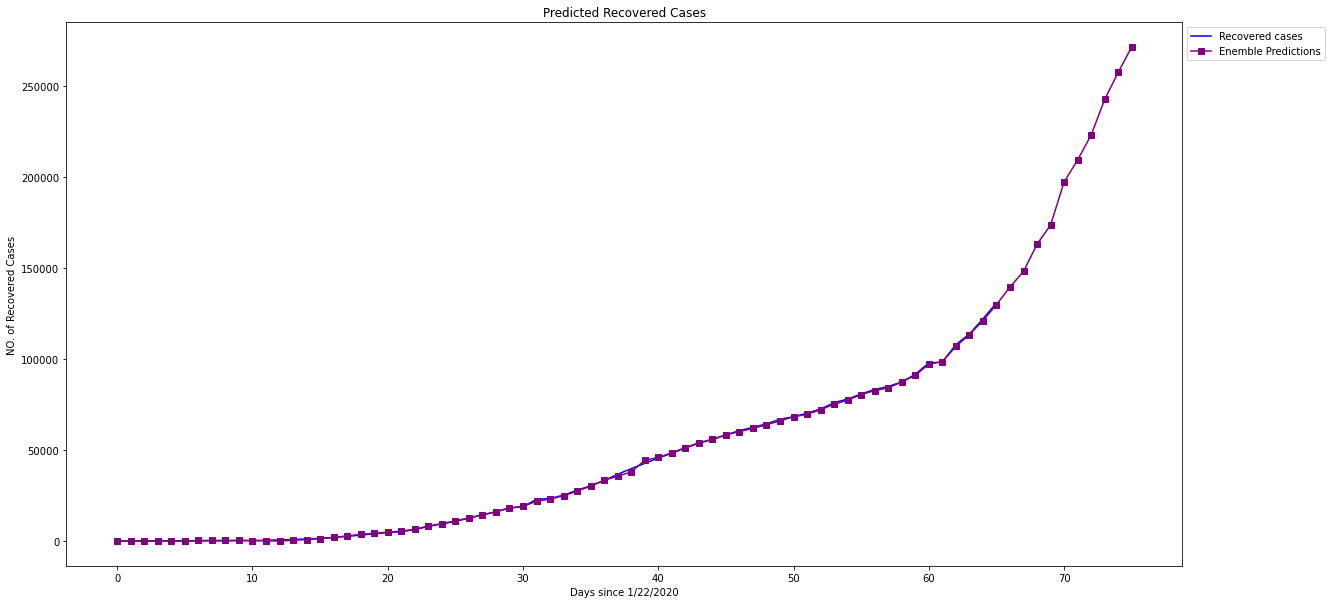

In [92]:
plt.figure(figsize=(20, 10))
plt.subplot(1,1,1)
pred=Ens.predict(X)
plt.plot(y_t,color='blue',label='Recovered cases')
plt.plot(pred,color='purple',label='Enemble Predictions',marker= "s")
plt.title('Predicted Recovered Cases')
plt.xlabel('Days since 1/22/2020')
plt.ylabel('NO. of Recovered Cases')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

# Evaluation Measures

### R2

In [93]:
y_pred = Ens.predict(X)
R_square=r2_score(y,y_pred)
print('R2 : ', round(R_square,5))

R2 :  0.99971


### Adjusted R2

In [94]:
print('Adjusted R2 :', round(1-(1-R_square)*(len(X)-1)/(len(X)-2-1), 5))

Adjusted R2 : 0.9997


### MSE

In [95]:
mse=mean_squared_error(y,y_pred)
print('Mean Squared Error: ', round(mse,2))

Mean Squared Error:  1373850.47


### MAE

In [96]:
mae=mean_absolute_error(y,y_pred)
print('Mean Absolute Error: ', round(mae,2))

Mean Absolute Error:  655.36


### RMSE

In [97]:
rmse = math.sqrt(mse)
print('RMSE: ', round(rmse,2))

RMSE:  1172.11


# Importing Deaths cases of COVID-19 directly from githubusercontent as updated dataset

In [99]:
data_deaths=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

### Selecting the Specific dates 

In [103]:
data_deaths=data_deaths.iloc[:,0:80]

# Exploratory data analysis

### Five top records of data

In [104]:
data_deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,4,4,4,4,4,6,6,7,7,11
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,10,10,11,15,15,16,17,20,20,21
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,29,31,35,44,58,86,105,130,152,173
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,3,6,8,12,14,15,16,17,18,21
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,0,2,2,2,2,2,2,2,2,2


### Five last records of data

In [105]:
data_deaths.tail()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20
264,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
265,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
266,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
267,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,1,1
268,NaN,Zimbabwe,-19.015438,29.154857,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1


### Coloumns/features in data

In [106]:
data_deaths.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20',
       '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20',
       '3/27/20', '3/28/20', '3/29/20', '3/30/20', '3/31/20', '4/1/20',
       '4/2/20', '4/3/20', '4/4/20', '4/5/20', '4/6/20'],
      dtype='object')

### Data information

In [107]:
data_deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 80 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  81 non-null     object 
 1   Country/Region  269 non-null    object 
 2   Lat             269 non-null    float64
 3   Long            269 non-null    float64
 4   1/22/20         269 non-null    int64  
 5   1/23/20         269 non-null    int64  
 6   1/24/20         269 non-null    int64  
 7   1/25/20         269 non-null    int64  
 8   1/26/20         269 non-null    int64  
 9   1/27/20         269 non-null    int64  
 10  1/28/20         269 non-null    int64  
 11  1/29/20         269 non-null    int64  
 12  1/30/20         269 non-null    int64  
 13  1/31/20         269 non-null    int64  
 14  2/1/20          269 non-null    int64  
 15  2/2/20          269 non-null    int64  
 16  2/3/20          269 non-null    int64  
 17  2/4/20          269 non-null    int

### Data types of all coloumns

In [108]:
data_deaths.dtypes

Province/State     object
Country/Region     object
Lat               float64
Long              float64
1/22/20             int64
                   ...   
4/2/20              int64
4/3/20              int64
4/4/20              int64
4/5/20              int64
4/6/20              int64
Length: 80, dtype: object

### Checking Null Values and Province/State has Nan values, we will fix next

In [109]:
data_deaths[data_deaths.isnull().any(axis=1)].head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,4,4,4,4,4,6,6,7,7,11
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,10,10,11,15,15,16,17,20,20,21
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,29,31,35,44,58,86,105,130,152,173
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,3,6,8,12,14,15,16,17,18,21
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,0,2,2,2,2,2,2,2,2,2


### Count of Null values,  this count is 188 and all is from Province/State

In [110]:
np.sum(data_deaths.isnull().any(axis=1))

188

### Data Description, here we can see the values of columns as minimum value, maximum value, counts etc

In [111]:
data_deaths.describe()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20
count,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,...,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000
mean,20.775060,24.427253,0.063197,0.066914,0.096654,0.156134,0.208178,0.304833,0.486989,0.494424,...,119.356877,132.282528,147.345725,165.011152,185.479554,208.665428,231.364312,254.289963,273.490706,295.598513
std,24.948161,71.408080,1.036508,1.038073,1.465380,2.439906,3.171904,4.634799,7.621455,7.621954,...,786.180887,859.456337,943.279941,1033.586931,1135.910850,1253.220082,1371.727653,1490.479477,1593.138997,1714.042695
min,-51.796300,-135.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.428055,-15.180400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,22.166700,21.005900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000
75%,41.112900,84.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,6.000000,7.000000,8.000000,8.000000,10.000000,11.000000,13.000000,15.000000,17.000000,19.000000
max,71.706900,178.065000,17.000000,17.000000,24.000000,40.000000,52.000000,76.000000,125.000000,125.000000,...,10023.000000,10779.000000,11591.000000,12428.000000,13155.000000,13915.000000,14681.000000,15362.000000,15887.000000,16523.000000


# Prepartion of data_confirmed_cases data

### Deleitng the Province/State	Country/Region	Lat	Long	 coloumns

In [112]:
data_deaths=data_deaths.drop(columns=['Province/State','Country/Region', 'Lat','Long'])

In [113]:
data_deaths.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20
0,0,0,0,0,0,0,0,0,0,0,...,4,4,4,4,4,6,6,7,7,11
1,0,0,0,0,0,0,0,0,0,0,...,10,10,11,15,15,16,17,20,20,21
2,0,0,0,0,0,0,0,0,0,0,...,29,31,35,44,58,86,105,130,152,173
3,0,0,0,0,0,0,0,0,0,0,...,3,6,8,12,14,15,16,17,18,21
4,0,0,0,0,0,0,0,0,0,0,...,0,2,2,2,2,2,2,2,2,2


### Getting sum of all dates

In [114]:
data_deaths=data_deaths.sum()
data_deaths.head()

1/22/20    17
1/23/20    18
1/24/20    26
1/25/20    42
1/26/20    56
dtype: int64

### Saving the sum of all dates in dataframe

In [115]:
data_deaths_cases=pd.DataFrame(data_deaths)
data_deaths_cases.head()

,0
1/22/20,17
1/23/20,18
1/24/20,26
1/25/20,42
1/26/20,56


### Creating new column of Dates

In [116]:
data_deaths_cases['Dates']=data_deaths_cases.index
data_deaths_cases.head()

,0,Dates
1/22/20,17,1/22/20
1/23/20,18,1/23/20
1/24/20,26,1/24/20
1/25/20,42,1/25/20
1/26/20,56,1/26/20


### Reseting the index

In [117]:
data_deaths_cases=data_deaths_cases.reset_index(drop=True)
data_deaths_cases.head()

,0,Dates
0,17,1/22/20
1,18,1/23/20
2,26,1/24/20
3,42,1/25/20
4,56,1/26/20


### Renaming the column

In [118]:
data_deaths_cases=data_deaths_cases.rename(columns={0:'data_deaths_cases'})
data_deaths_cases=data_deaths_cases[['Dates','data_deaths_cases']]
data_deaths_cases.head()

,Dates,data_deaths_cases
0,1/22/20,17
1,1/23/20,18
2,1/24/20,26
3,1/25/20,42
4,1/26/20,56


### Date settings and data preparation

In [119]:
data_deaths_cases['times'] = pd.to_datetime(data_deaths_cases['Dates'])  
data_deaths_cases.set_index('times', inplace=True)                   
data_deaths_cases.sort_index(ascending=True, inplace=True)
tar='Deaths Predictions'
data_deaths_cases.rename(columns={'data_deaths_cases':tar}, inplace=True)
data_deaths_cases=data_deaths_cases[[tar]]

### Spliting date into  month, year and Day of month

In [120]:
def create_features(data, label=None):
    data['date'] = data.index
    data['month'] = data['date'].dt.month
    data['year'] = data['date'].dt.year
    data['dayofmonth'] = data['date'].dt.day
    X = data[['month','year','dayofmonth']]
    if label:
        y = data[label]
        return X, y
    return X

### Data for training input and prediction output

In [121]:
X=data_deaths_cases.copy()
X= create_features(X)
y=data_deaths_cases
y=np.array(y)
y_t = y[:int(0.87*(len(y)))]

# Ensemble Technique to combine algorithms (GradientBoostingRegressor + random Forest Regressor) and making one

In [130]:
RF_model = RandomForestRegressor()
GB_model  = GradientBoostingRegressor()

In [131]:
Ens = VotingRegressor( estimators= [('model1',RF_model),('model2',GB_model)])
Ens= Ens.fit(X , y)
Ens

VotingRegressor(estimators=[('model1', RandomForestRegressor()),
                            ('model2', GradientBoostingRegressor())])

# Graph of the actual and predicted Deaths with 10 days forecasting

### R2

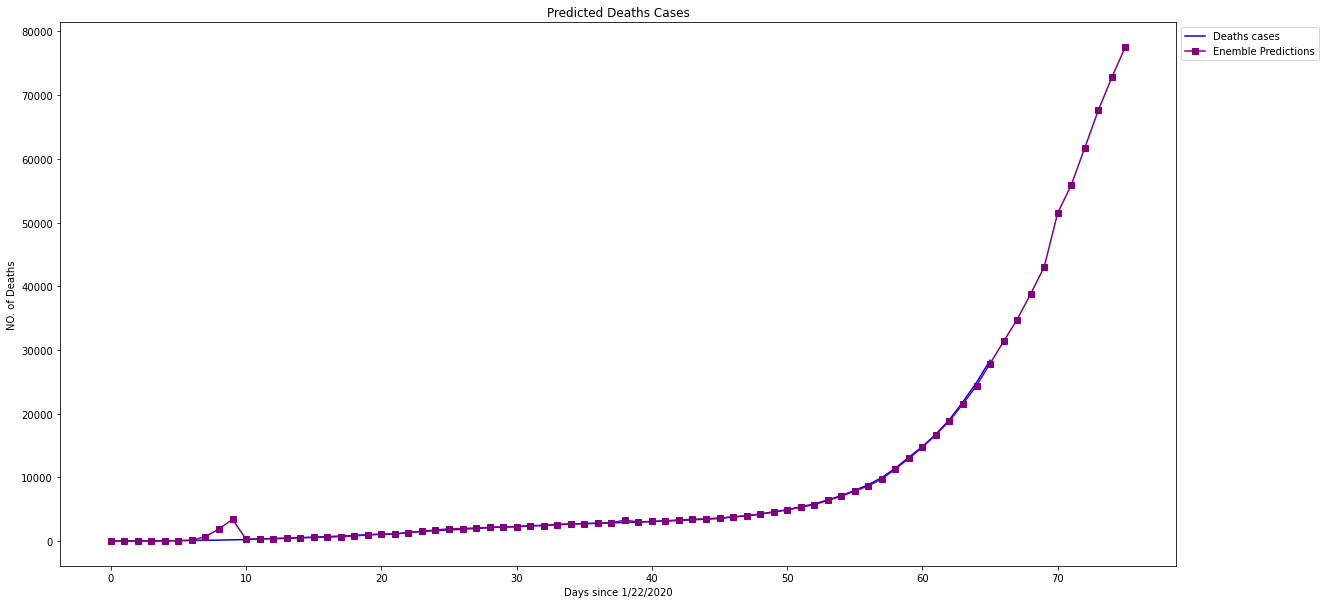

In [132]:
plt.figure(figsize=(20, 10))
plt.subplot(1,1,1)
pred=Ens.predict(X)
plt.plot(y_t,color='blue',label='Deaths cases')
plt.plot(pred,color='purple',label='Enemble Predictions',marker= "s")
plt.title('Predicted Deaths Cases')
plt.xlabel('Days since 1/22/2020')
plt.ylabel('NO. of Deaths')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

# Evaluation Measures

In [105]:
y_pred = Ens.predict(X)
R_square=r2_score(y,y_pred)
print('R2 : ', round(R_square,5))

R2 :  0.99942


### Adjusted R2

In [106]:
print('Adjusted R2 :', round(1-(1-R_square)*(len(X)-1)/(len(X)-2-1), 5))

Adjusted R2 : 0.99941


### MSE

In [107]:
mse=mean_squared_error(y,y_pred)
print('Mean Squared Error: ', round(mse,2))

Mean Squared Error:  200297.36


### MAE

In [108]:
mae=mean_absolute_error(y,y_pred)
print('Mean Absolute Error: ', round(mae,2))

Mean Absolute Error:  215.2


### RMSE

In [109]:
rmse = math.sqrt(mse)
print('RMSE: ', round(rmse,2))

RMSE:  447.55


#aouther @alrehaili_meaad